In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline
#from keplergl import KeplerGl

In [2]:
data = pd.read_csv('test.csv')
data.drop('Unnamed: 0',inplace=True,axis=1)

In [3]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,11,1800,37.525650,126.887817,37.535961,126.898300,1.472768,1,1,0,...,17,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,14,2280,37.554859,126.936157,37.549904,126.955147,1.762402,1,1,0,...,31,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,13,2160,37.531860,127.067192,37.539654,127.052589,1.552109,1,1,0,...,32,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,20,5250,37.484661,126.903900,37.507332,126.879730,3.301778,1,1,0,...,42,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,3,630,37.479916,126.902840,37.483192,126.902031,0.371204,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [4]:
import folium

In [5]:
pickup_locations = data[["PLatd", "PLong"]]

In [6]:
map_1 = folium.Map(location=[pickup_locations.PLatd.mean(), pickup_locations.PLong.mean()], zoom_start=14, control_scale=True)

In [7]:
map_1

In [10]:
for index, location_info in pickup_locations.iterrows():
    folium.Marker([location_info["PLatd"][10], location_info["PLong"][10]]).add_to(map_1)

IndexError: invalid index to scalar variable.

In [14]:
map_1

KeyboardInterrupt: 

In [19]:
folium.Marker([pickup_locations["PLatd"], pickup_locations["PLong"]]).add_to(map_1)

ValueError: Location should consist of two numerical values, but 0         126.887817
1         126.936157
2         127.067192
3         126.903900
4         126.902840
             ...    
960108    126.951324
960109    126.965919
960110    127.078239
960111    127.078239
960112    126.912827
Name: PLatd, Length: 960113, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [18]:
pickup_locations["PLatd"]

0         126.887817
1         126.936157
2         127.067192
3         126.903900
4         126.902840
             ...    
960108    126.951324
960109    126.965919
960110    127.078239
960111    127.078239
960112    126.912827
Name: PLatd, Length: 960113, dtype: float64

NameError: name 'street_map' is not defined

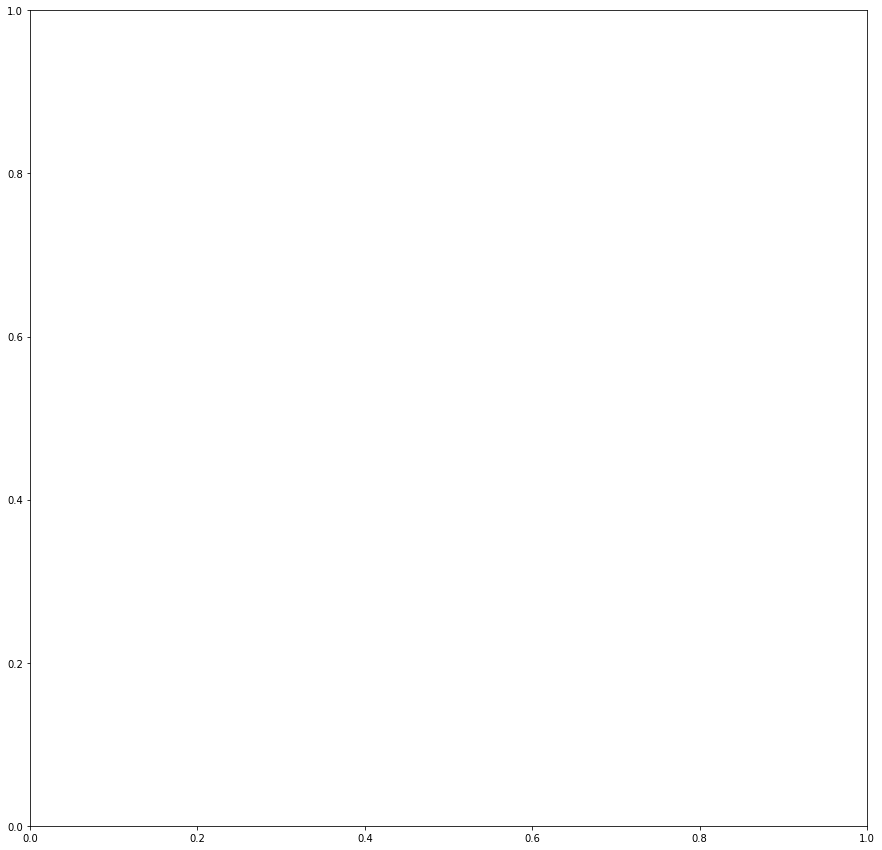

In [51]:
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='Duration',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('XYZ', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

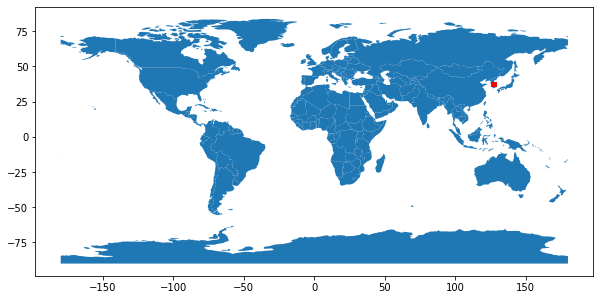

In [41]:
#geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
#gdf = GeoDataFrame(df, geometry=geometry)   
pgeo = gpd.GeoDataFrame(df,geometry=Ppoints)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
pgeo.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [36]:
Latitude = df.PLatd
Longitude = df.PLong
location = geolocator.reverse((df['PLatd'],df['PLong']))
location

ValueError: Must be a coordinate pair or Point

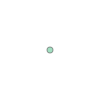

In [3]:
Point(-88,5)

In [4]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [5]:
df.columns[7:17]


Index(['Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek'],
      dtype='object')

In [23]:
df['Ppoints'] = df.apply(lambda row: Point(row.PLatd,row.PLong),axis=1)
df['Ppoints']

0          POINT (126.887817 37.52565)
1         POINT (126.936157 37.554859)
2          POINT (127.067192 37.53186)
3           POINT (126.9039 37.484661)
4          POINT (126.90284 37.479916)
                      ...             
960108    POINT (126.951324 37.543579)
960109     POINT (126.965919 37.56749)
960110     POINT (127.078239 37.51128)
960111     POINT (127.078239 37.51128)
960112    POINT (126.912827 37.548645)
Name: Ppoints, Length: 960113, dtype: object

In [7]:
Dpoints = df.apply(lambda row: Point(row.DLong,row.DLatd),axis=1)
Dpoints.head()


0      POINT (37.535961 126.8983)
1    POINT (37.549904 126.955147)
2    POINT (37.539654 127.052589)
3     POINT (37.507332 126.87973)
4    POINT (37.483192 126.902031)
dtype: object

In [8]:
coord = pd.concat([Ppoints,Dpoints], axis=1)
coord.head()


,0,1
0,POINT (37.52565 126.887817),POINT (37.535961 126.8983)
1,POINT (37.554859 126.936157),POINT (37.549904 126.955147)
2,POINT (37.53186 127.067192),POINT (37.539654 127.052589)
3,POINT (37.484661 126.9039),POINT (37.507332 126.87973)
4,POINT (37.479916 126.90284),POINT (37.483192 126.902031)


In [9]:
coord.rename(columns={0:'Ppoints',1:'Dpoints'},inplace=True)
coord.head()

,Ppoints,Dpoints
0,POINT (37.52565 126.887817),POINT (37.535961 126.8983)
1,POINT (37.554859 126.936157),POINT (37.549904 126.955147)
2,POINT (37.53186 127.067192),POINT (37.539654 127.052589)
3,POINT (37.484661 126.9039),POINT (37.507332 126.87973)
4,POINT (37.479916 126.90284),POINT (37.483192 126.902031)


In [10]:
pgeo = gpd.GeoDataFrame(df,geometry=Ppoints)
pgeo.crs = {'init':'epsg:4326'}
pgeo.head()
pgeo.columns

C:\Users\pc\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust', 'geometry'],
      dtype='object')

<AxesSubplot:>

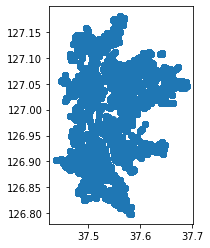

In [11]:
pgeo.plot(aspect=1)


In [12]:
pgeo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
pgeo.geometry.area

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
960108    0.0
960109    0.0
960110    0.0
960111    0.0
960112    0.0
Length: 960113, dtype: float64

In [14]:
pgeo_mrct = pgeo.to_crs(epsg=4326)


<AxesSubplot:>

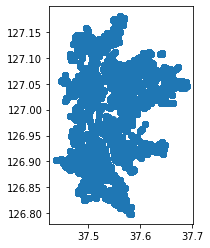

In [15]:
pgeo_mrct.plot(aspect=1)

In [16]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust', 'geometry'],
      dtype='object')

In [17]:
type(tuple(df.PLatd))

tuple

In [18]:
locations = df[['PLatd', 'PLong']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[127.10096, 37.513126]

In [23]:
df = gpd.tools.reverse_geocode([df.PLong,df.PLatd])

AttributeError: module 'geopandas' has no attribute 'reverse_geocode'

In [33]:
import folium

map_pickup = folium.Map(location=[37.547618,126.990795], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(map)
map_pickup

AttributeError: type object 'map' has no attribute 'add_child'

In [ ]:

import folium

# create the map.
map_pickup = folium.Map( location=[-1.317755,36.830370])

# adding the latitude and longitude points to the map.
train.apply(lambda row:folium.CircleMarker(location=[row["Pickup Lat"], row["Pickup Long"]] ).add_to(map_pickup), axis=1)

# display the map: just ask for the object representation in juypter notebook.
map_pickup

# optional: save the map.
map_pickup.save('map_pickup.html')

In [ ]:
# # The data to load
# f = "bike.csv"

# # Count the lines
# num_lines = sum(1 for l in open(f))
# print(num_lines)
# # Sample size - in this case ~10%
# size = int(num_lines / 10)

# # The row indices to skip - make sure 0 is not included to keep the header!
# skip_idx = random.sample(range(1, num_lines), num_lines - size)

# # Read the data
# data = pd.read_csv(f, skiprows=skip_idx)

In [7]:
#data.to_csv('test.csv',index=False)

In [3]:
coo = gpd.read_file('test.csv')

In [4]:
coo.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,geometry
0,14,11,1800,37.52565,126.887817,37.535961,126.8983,1.4727683355861676,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
1,43,14,2280,37.554859,126.93615700000001,37.549904,126.955147,1.762402437498416,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
2,49,13,2160,37.531859999999995,127.06719199999999,37.539654,127.05258899999998,1.5521094331774636,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
3,61,20,5250,37.484660999999996,126.9039,37.507332,126.87973000000001,3.3017781704387983,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
4,65,3,630,37.479915999999996,126.90284,37.483191999999995,126.90203100000001,0.3712036886976979,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None


In [5]:
coo.shape

(960113, 27)

In [9]:
coo.drop(['Unnamed: 0'], axis=1)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,geometry
0,11,1800,37.52565,126.887817,37.535961,126.8983,1.4727683355861676,1,1,0,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
1,14,2280,37.554859,126.93615700000001,37.549904,126.955147,1.762402437498416,1,1,0,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
2,13,2160,37.531859999999995,127.06719199999999,37.539654,127.05258899999998,1.5521094331774636,1,1,0,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
3,20,5250,37.484660999999996,126.9039,37.507332,126.87973000000001,3.3017781704387983,1,1,0,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
4,3,630,37.479915999999996,126.90284,37.483191999999995,126.90203100000001,0.3712036886976979,1,1,0,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960108,16,2360,37.543579,126.951324,37.543579,126.951324,0.0,12,31,23,...,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0,None
960109,26,2340,37.56749,126.965919,37.569939,126.977539,1.0597234040209575,12,31,23,...,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0,None
960110,35,2740,37.51128,127.078239,37.51128,127.078239,0.0,12,31,23,...,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0,None
960111,35,2760,37.51128,127.078239,37.51128,127.078239,0.0,12,31,23,...,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0,None


<AxesSubplot:>

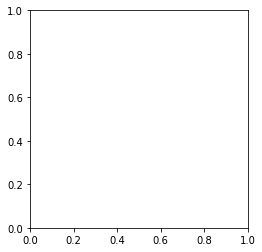

In [10]:
coo.plot()

In [ ]:
data.head()

<AxesSubplot:>

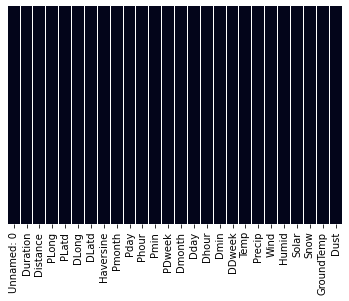

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [34]:
data.isnull().sum()

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

In [47]:
data.drop('Unnamed: 0', axis=1, inplace=True)


In [55]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,...,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000,960113.000000
mean,25.812175,3715.180116,37.547578,126.990816,37.547683,126.990730,1.873103,7.580550,15.777236,14.369712,...,30.039917,2.944789,18.561617,0.017755,1.819308,53.989488,0.728809,0.010117,20.711738,32.438019
std,25.051994,3956.765453,0.044371,0.082604,0.044425,0.083257,1.999728,2.695441,8.751177,6.257666,...,17.311234,1.977370,9.492859,0.366605,0.972092,17.420867,0.916196,0.166662,12.639915,24.061568
min,1.000000,1.000000,37.437271,126.798599,37.437271,126.798599,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,-17.800000,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,8.000000,1230.000000,37.514240,126.920036,37.514240,126.919395,0.674016,6.000000,8.000000,10.000000,...,15.000000,1.000000,12.200000,0.000000,1.100000,41.000000,0.000000,0.000000,11.600000,16.000000
50%,16.000000,2280.000000,37.546848,126.994293,37.546547,126.994682,1.258996,8.000000,16.000000,16.000000,...,30.000000,3.000000,20.100000,0.000000,1.700000,53.000000,0.270000,0.000000,21.100000,27.000000
75%,36.000000,4620.000000,37.573242,127.061897,37.573242,127.062752,2.368855,10.000000,23.000000,19.000000,...,45.000000,5.000000,25.500000,0.000000,2.400000,67.000000,1.260000,0.000000,28.500000,42.000000
max,119.000000,33290.000000,37.689720,127.180267,37.689720,127.180267,28.634480,12.000000,31.000000,23.000000,...,59.000000,6.000000,39.400000,35.000000,7.400000,98.000000,3.520000,8.800000,62.200000,304.000000


In [49]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,25,4770,37.593288,127.036667,37.582500,126.998535,3.567644,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,14,2720,37.563858,127.030319,37.567650,127.051155,1.884253,1,1,0,...,31,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,22,2750,37.514240,127.123070,37.513126,127.100960,1.954050,1,1,0,...,43,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,34,4060,37.509121,127.062309,37.489342,127.041298,2.876226,1,1,0,...,59,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,10,1880,37.491032,126.892151,37.503117,126.880386,1.697953,1,1,0,...,37,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [50]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

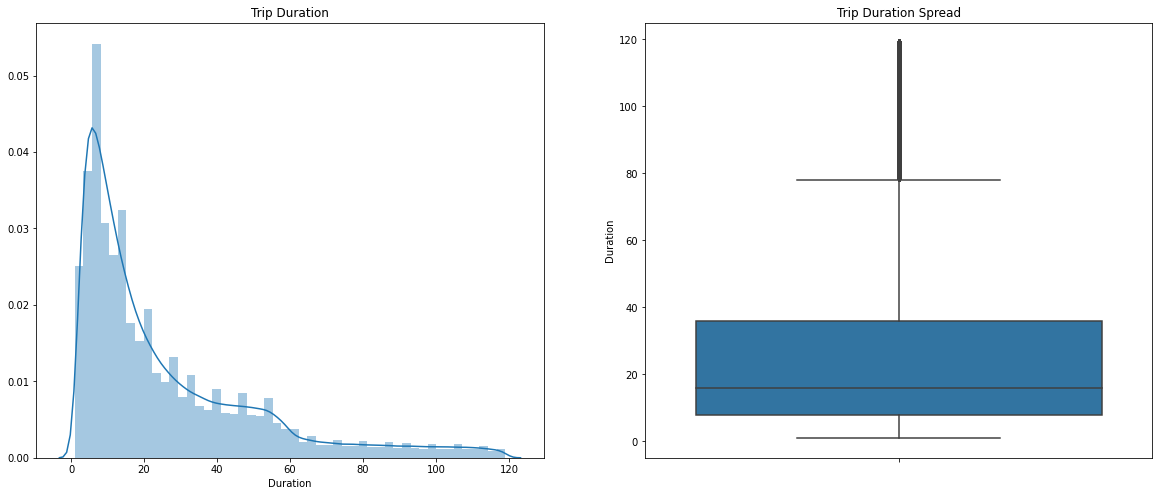

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Trip Duration")
sns.distplot(data.Duration)

plt.subplot(1,2,2)
plt.title('Trip Duration Spread')
sns.boxplot(y=data.Duration)

plt.show()

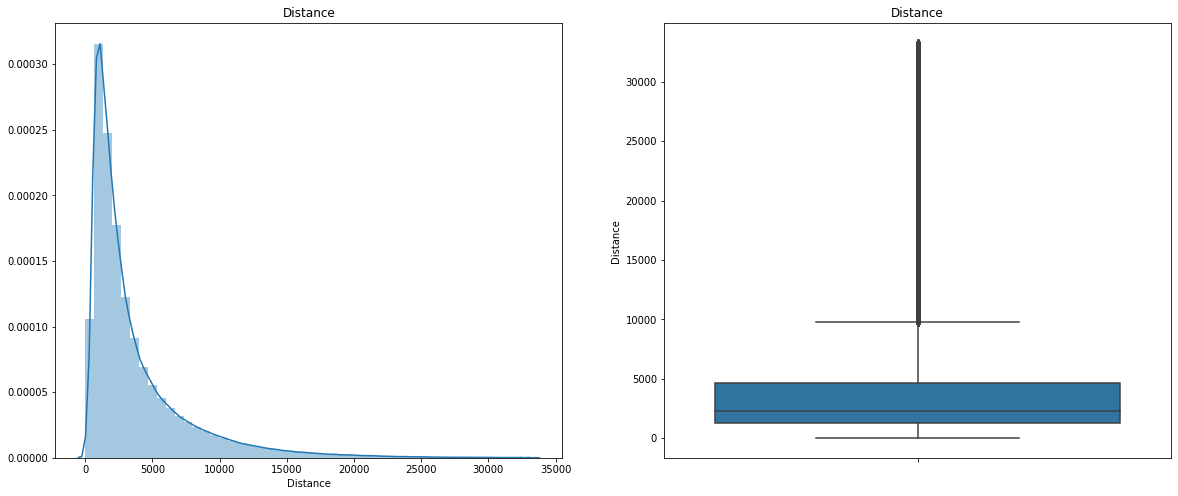

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Distance")
sns.distplot(data.Distance)

plt.subplot(1,2,2)
plt.title('Distance')
sns.boxplot(y=data.Distance)

plt.show()

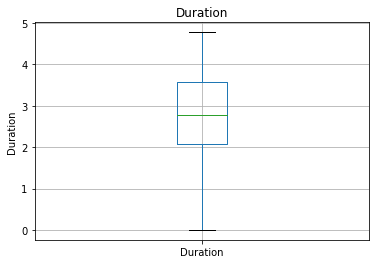

In [27]:
data.boxplot(column='Distance')
plt.ylabel('Distance')
plt.title('Distance')
plt.show()

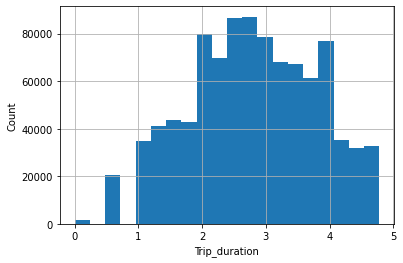

In [27]:
np.log(data['Duration']).hist(bins=20)
plt.xlabel('Trip_duration')
plt.ylabel("Count")

#xticks(rotation = 90)

plt.show()

In [41]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,4,630,37.552914,126.836571,37.557968,126.838287,0.581982,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,22,3140,37.479465,127.125328,37.499985,127.135391,2.448374,1,1,0,...,29,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,6,1610,37.513359,126.948059,37.505852,126.939362,1.133699,1,1,0,...,14,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,14,2520,37.484230,126.926392,37.471165,126.937019,1.729138,1,1,0,...,22,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,32,5040,37.467506,127.034477,37.494236,127.047462,3.185447,1,1,0,...,51,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960113 entries, 0 to 960112
Data columns (total 25 columns):
Duration      960113 non-null int64
Distance      960113 non-null int64
PLong         960113 non-null float64
PLatd         960113 non-null float64
DLong         960113 non-null float64
DLatd         960113 non-null float64
Haversine     960113 non-null float64
Pmonth        960113 non-null int64
Pday          960113 non-null int64
Phour         960113 non-null int64
Pmin          960113 non-null int64
PDweek        960113 non-null int64
Dmonth        960113 non-null int64
Dday          960113 non-null int64
Dhour         960113 non-null int64
Dmin          960113 non-null int64
DDweek        960113 non-null int64
Temp          960113 non-null float64
Precip        960113 non-null float64
Wind          960113 non-null float64
Humid         960113 non-null float64
Solar         960113 non-null float64
Snow          960113 non-null float64
GroundTemp    960113 non-null float64
D

In [55]:
continuous_feature = ['Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust']

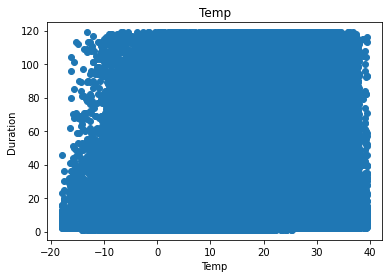

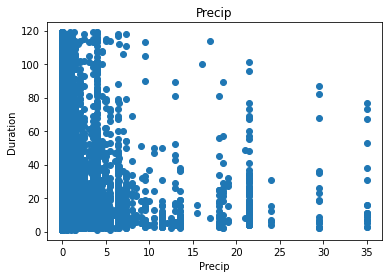

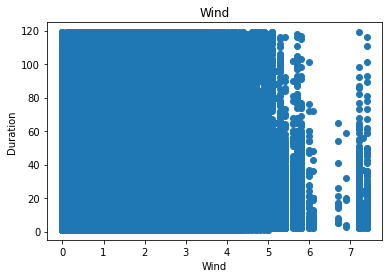

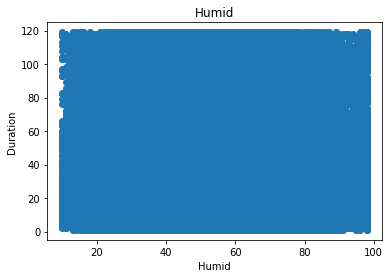

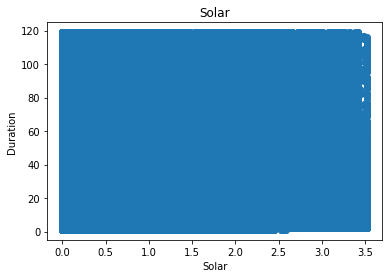

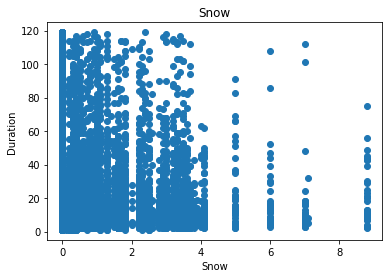

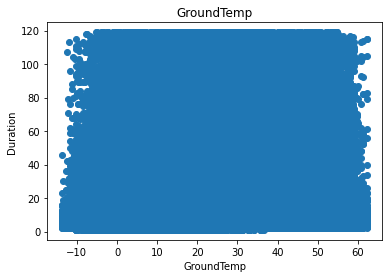

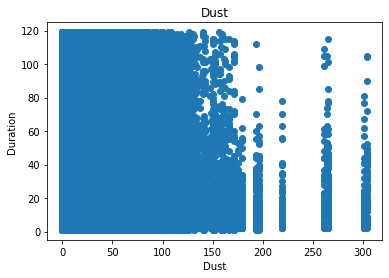

In [56]:
for feature in continuous_feature:

    data[feature]= data[feature].astype('float64')
    #data['Duration']=data['Duration'].astype('float64')
    plt.scatter(data[feature],data['Duration'])
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.title(feature)
    plt.show()

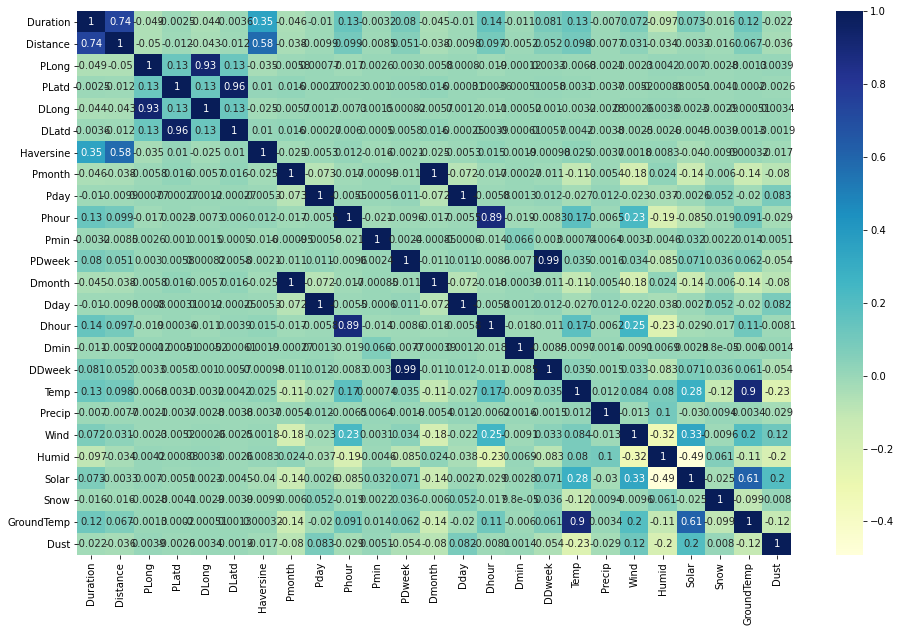

In [57]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
data['Pday'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [31]:
data['Dday'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

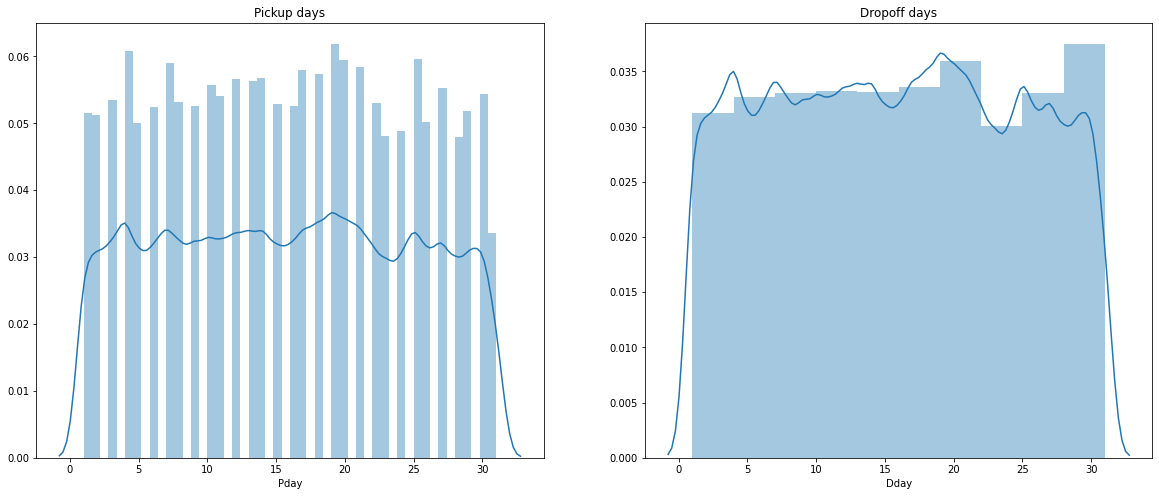

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Pickup days")
sns.distplot(data.Pday)

plt.subplot(1,2,2)
plt.title('Dropoff days')
sns.distplot(data.Dday,bins=10)

plt.show()

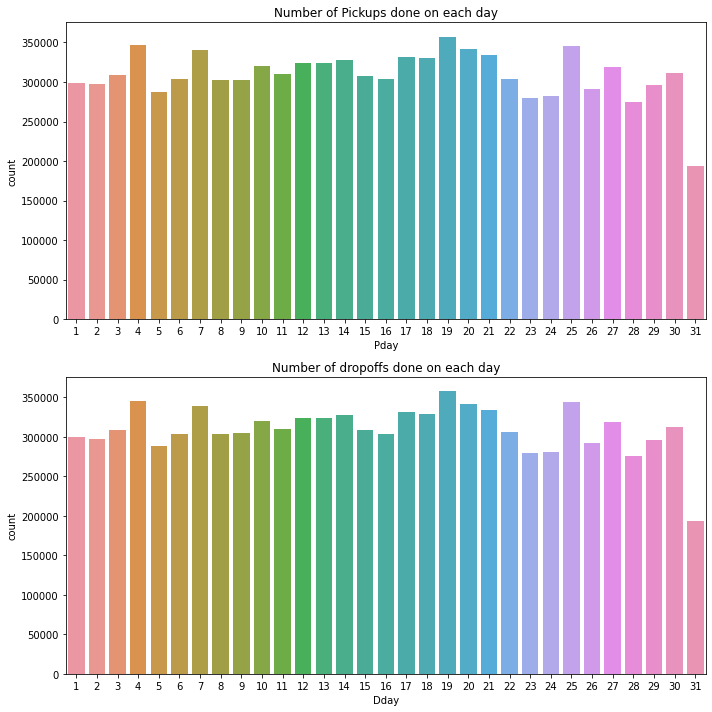

In [42]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pday',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day')
sns.countplot(x='Dday',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day')
plt.tight_layout()

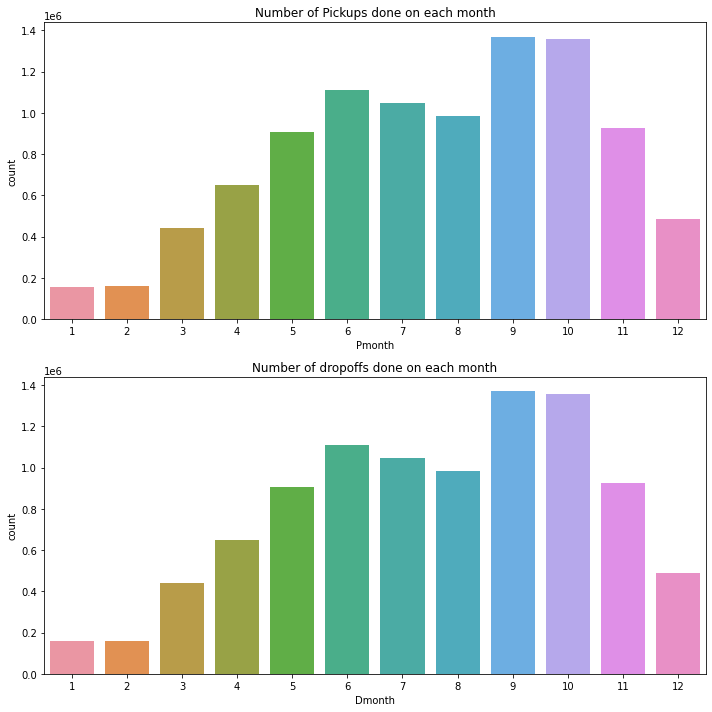

In [78]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pmonth',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each month')
sns.countplot(x='Dmonth',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each month')
plt.tight_layout()


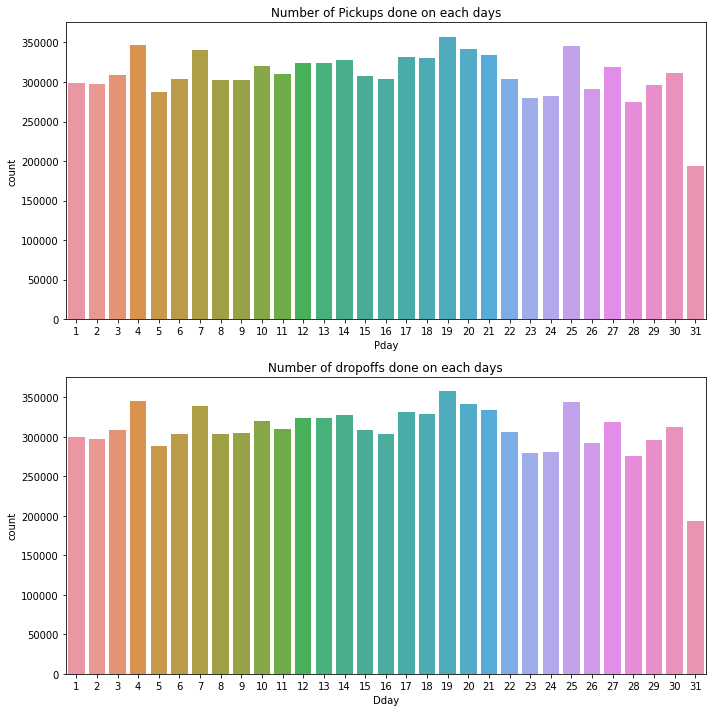

In [79]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pday',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each days')
sns.countplot(x='Dday',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each days')
plt.tight_layout()


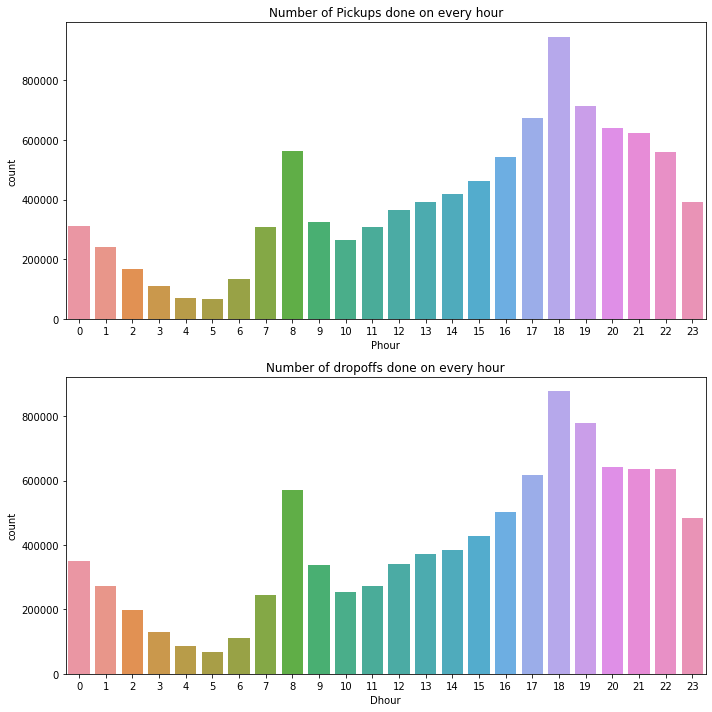

In [81]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Phour',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on every hour')
sns.countplot(x='Dhour',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on every hour')
plt.tight_layout()


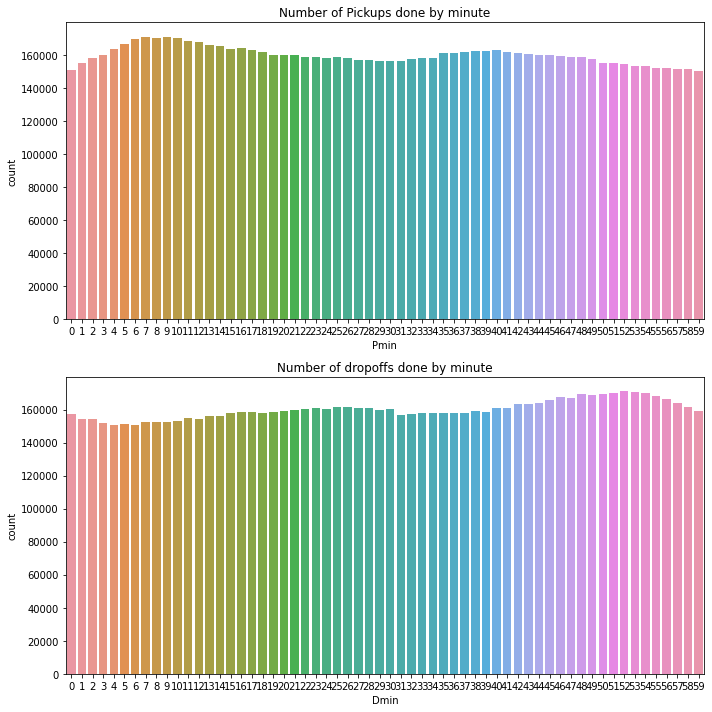

In [82]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='Pmin',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done by minute')
sns.countplot(x='Dmin',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done by minute')
plt.tight_layout()


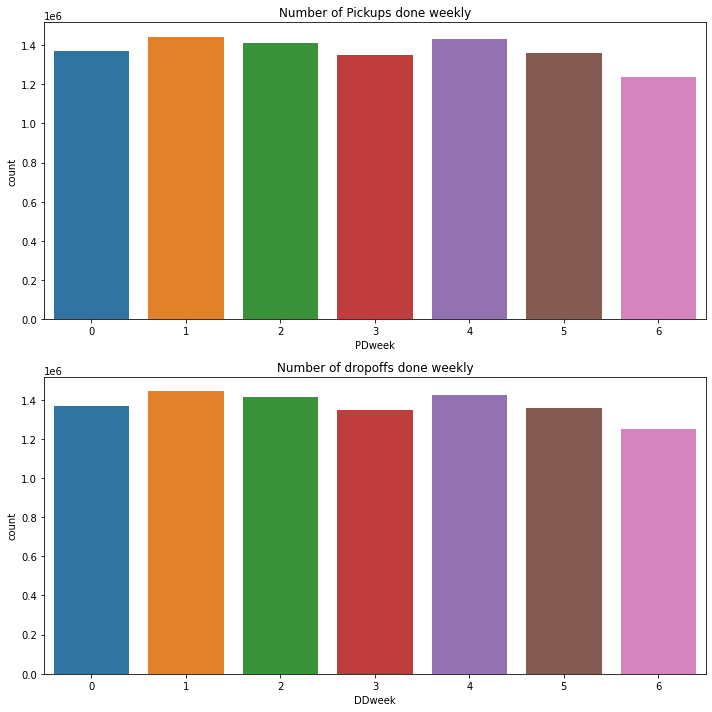

In [84]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='PDweek',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done weekly')
sns.countplot(x='DDweek',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done weekly')
plt.tight_layout()


In [95]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

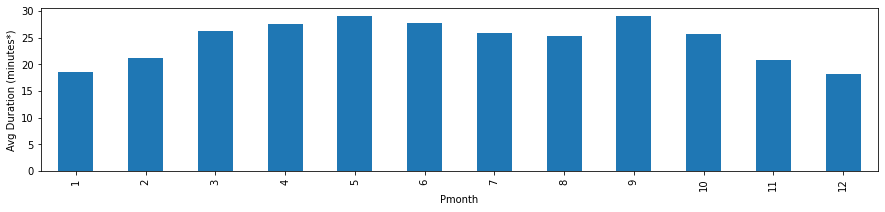

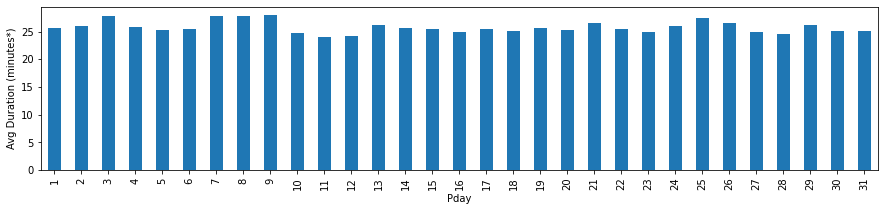

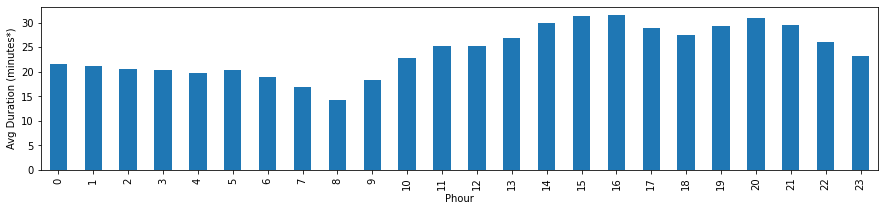

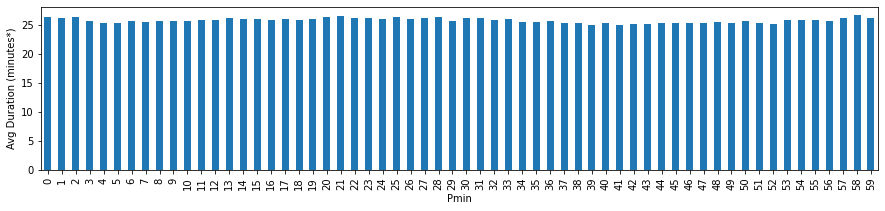

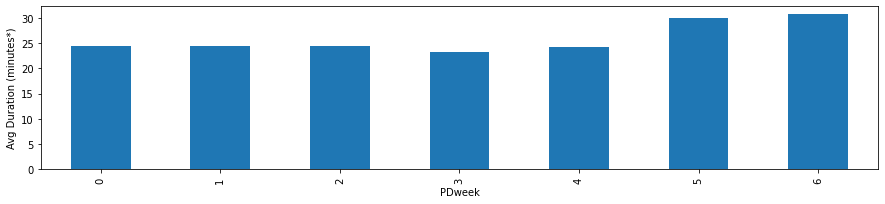

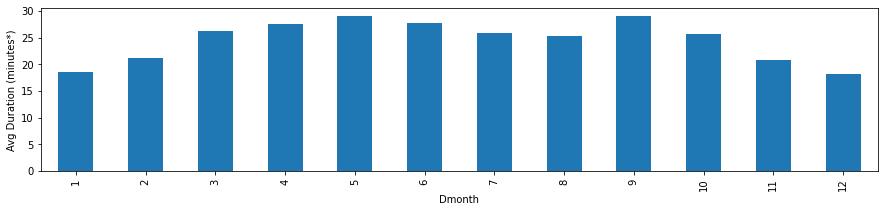

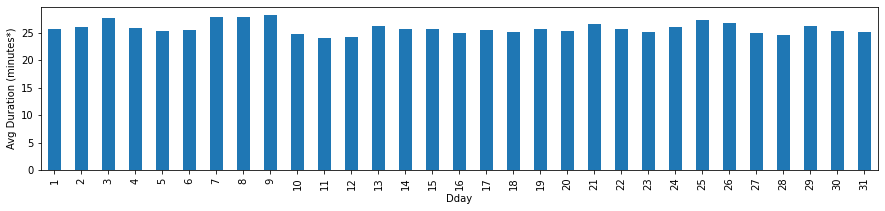

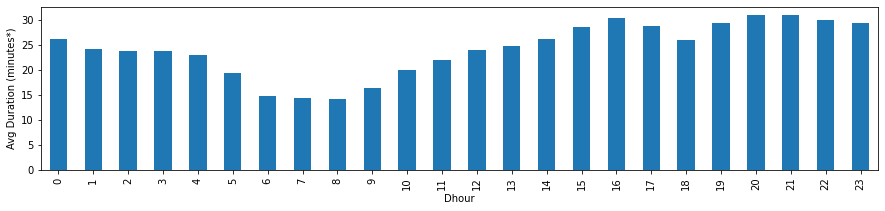

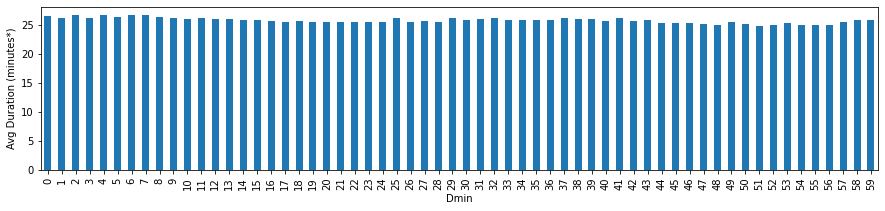

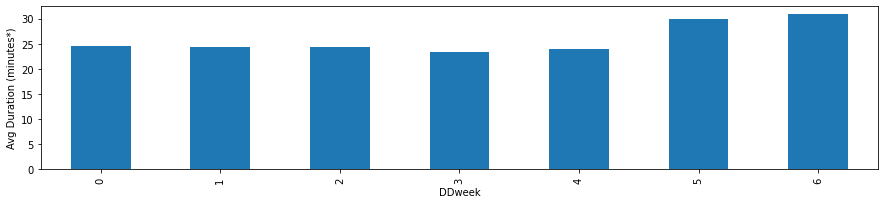

In [57]:
for x in data.columns[7:17]:
    avg_duration = data[[x,'Duration']].groupby(x, as_index = False).mean().rename(columns={'Duration':'average_duration monthly'})
    plt1 = avg_duration.plot(x = x, kind='bar',legend = False, sort_columns = True, figsize = (15,3))
    plt1.set_xlabel(x)
    plt1.set_ylabel("Avg Duration (minutes*)")
    #xticks(rotation = 90)
    plt.show()

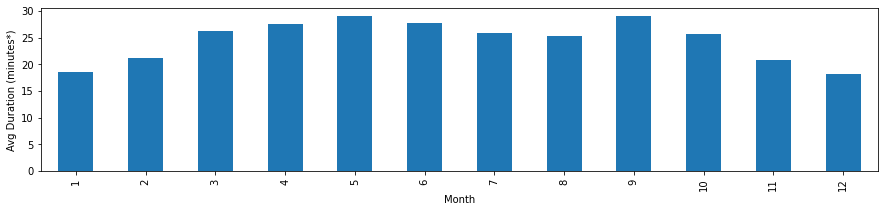

In [56]:
avg_duration = data[['Pmonth','Duration']].groupby("Pmonth", as_index = False).mean().rename(columns={'Duration':'average_duration monthly'})
plt1 = avg_duration.plot(x = 'Pmonth', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Month")
plt1.set_ylabel("Avg Duration (minutes*)")
#xticks(rotation = 90)
plt.show()

In [61]:
for col in data.columns:
    print(col, ':', len(data[col].unique()), ' labels')

Duration : 119  labels
Distance : 3294  labels
PLong : 1492  labels
PLatd : 1499  labels
DLong : 1493  labels
DLatd : 1500  labels
Haversine : 108137  labels
Pmonth : 12  labels
Pday : 31  labels
Phour : 24  labels
Pmin : 60  labels
PDweek : 7  labels
Dmonth : 12  labels
Dday : 31  labels
Dhour : 24  labels
Dmin : 60  labels
DDweek : 7  labels
Temp : 547  labels
Precip : 57  labels
Wind : 65  labels
Humid : 89  labels
Solar : 345  labels
Snow : 42  labels
GroundTemp : 700  labels
Dust : 163  labels


In [58]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

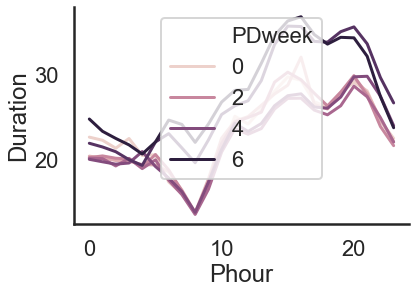

In [71]:
summary_hour_duration = pd.DataFrame(data.groupby(['PDweek','Phour'])['Duration'].mean())
summary_hour_duration.reset_index(inplace = True)
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.lineplot(data=summary_hour_duration, x="Phour",hue="PDweek" , y="Duration")
sns.despine(bottom = False)

<AxesSubplot:xlabel='Phour', ylabel='Duration'>

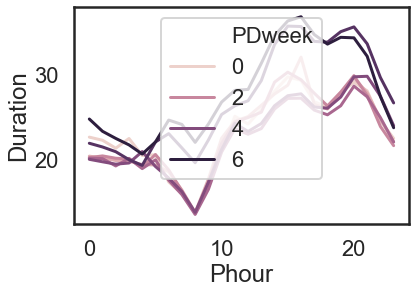

In [73]:
sns.lineplot(data=summary_hour_duration, x="Phour", hue="PDweek", y="Duration")


ValueError: These `style` levels are missing dashes: {'DDweek', 'Snow', 'Wind', 'Phour', 'Pmonth', 'Dmonth', 'Pmin', 'GroundTemp', 'Precip', 'Humid', 'Dmin', 'Dday', 'PDweek', 'Haversine', 'Pday', 'Solar', 'Dust', 'Dhour', 'Temp'}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_mat

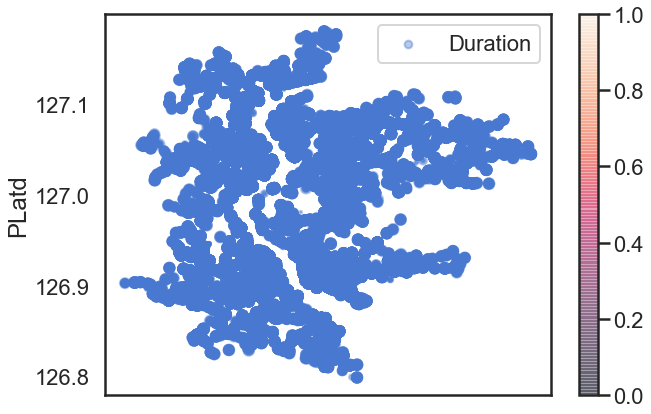

In [76]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
data.plot(kind="scatter", x="PLong", y="PLatd",
    s=data['Duration'], label="Duration",
    cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
#plt.legend()
#save_fig("housing_prices_scatterplot")
plt.show()

In [79]:
plt.plot(data.PLong, data.PLatd)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>